<a href="https://colab.research.google.com/github/vxvrma/My-first-repository/blob/master/Getting_Started_with_Pandas_Library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Getting Started with [Pandas](https://pandas.pydata.org/) Library 

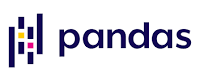

## The Pandas online cheat sheet

Throughout this and all future notebooks, we will refer to the Pandas function cheat sheet as a resource to help us understand the most important functions and how to use them

https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

#Importing Pandas Library into Colab 

In [1]:
import pandas as pd

For Google Colab to find the simulation files in the Drive, we need to mount the drive to use the files in this notebook. We can use the os library to open the right folder in the Google drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
import os

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
os.chdir("/content/gdrive/My Drive/Courses/Edx Data Science for AEC/EDX Data Science for Construction, Architecture and Engineering/2 - Building Design - Intro to Pandas/simulation_data")

We will take a look at all the files in folder using the ls command -- this command is typical of a linux command line and the Colab notebook let's use execute these types of commands in addition to Python

In [4]:
ls

 Baseline.csv                      'Scenario - Increase Setpoint.csv'
 Baseline.gsheet                   'Scenario - Low-E Glass.csv'
'Scenario - Aircon Schedules.csv'  'Scenario - Rooftop Gardens.csv'
'Scenario - Cool roof.csv'


In [5]:
df = pd.DataFrame(
[[4, 7, 10],
[5, 8, 11],
[6, 9, 12]],
index=[1, 2, 3],
columns=['a', 'b', 'c'])

In [6]:
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


#Loading Data from files
Instead of creating DataFrames from scratch, we generally load data from various file types - the most common being files with the extension .csv or .xlsx. There are several pandas functions to both read and write data from and to various files.

The following is a list of functions in pandas (https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html):

![alt text](https://github.com/buds-lab/the-building-data-genome-project/blob/master/docs/edx-graphics/EDX-SimulationImage-8.png?raw=true)

First step, let's load the baseline .csv file:

In [8]:
baseline_data=pd.read_csv("Baseline.csv")
baseline_data

,Month,Baseline
0,January,5.69
1,February,6.75
2,March,10.64
3,April,13.60
4,May,19.34
5,June,22.64
6,July,27.02
7,August,27.13
8,September,25.04
9,October,18.47


#Attribute tuning for .read_csv()
Right now, the file has been loaded, but let's make the Month column the index -- to do this we can use the attribute index_col=

In [9]:
baseline_data = pd.read_csv("Baseline.csv", index_col='Month')
baseline_data

,Baseline
Month,
January,5.69
February,6.75
March,10.64
April,13.60
May,19.34
June,22.64
July,27.02
August,27.13
September,25.04


# DataFrame Objects Overview

A DataFrame object is a multi-purpose two dimensional object that has dozens of functions that can be applied to it to see what's inside in different ways.

A DataFrame is made up of an `index` and a set of `columns`. 

The DataFrame object allows us to put data in the **tidy data** format with variables as columns and observations as rows


In [11]:
baseline_data.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='Month')

In [12]:
baseline_data.columns

Index(['Baseline'], dtype='object')

The .info() object is useful in seeing a DataFrame in way that summarizes the number of columns and the type of data in that column. This view is also useful to understand if there are missing values

In [13]:
baseline_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, January to December
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Baseline  12 non-null     float64
dtypes: float64(1)
memory usage: 192.0+ bytes


## Subset of Variables
Each column is a Pandas *Series* object - which we can select using the name of the column inside of brackets. In this case, there is only a single column. 

There are two ways to select a column within a DataFrame:


In [14]:
baseline_data['Baseline']

Month
January       5.69
February      6.75
March        10.64
April        13.60
May          19.34
June         22.64
July         27.02
August       27.13
September    25.04
October      18.47
November     13.02
December      7.53
Name: Baseline, dtype: float64

In [15]:
baseline_data.Baseline

Month
January       5.69
February      6.75
March        10.64
April        13.60
May          19.34
June         22.64
July         27.02
August       27.13
September    25.04
October      18.47
November     13.02
December      7.53
Name: Baseline, dtype: float64

## Subset of observations

We can see only the first or last few lines using `.tail()` and `.head()`

In [16]:
baseline_data.head()

,Baseline
Month,
January,5.69
February,6.75
March,10.64
April,13.60
May,19.34


In [17]:
baseline_data.tail()

,Baseline
Month,
August,27.13
September,25.04
October,18.47
November,13.02
December,7.53


Rows in a DataFrame can be filtered using a conditional statement

In [18]:
baseline_data[baseline_data['Baseline'] > 10]

,Baseline
Month,
March,10.64
April,13.60
May,19.34
June,22.64
July,27.02
August,27.13
September,25.04
October,18.47
November,13.02


We can get a random sample of the rows in the DataFrame

In [19]:
baseline_data.sample(frac=0.5)

,Baseline
Month,
July,27.02
May,19.34
September,25.04
June,22.64
March,10.64
January,5.69


In [20]:
baseline_data.sample(n=3)

,Baseline
Month,
March,10.64
June,22.64
February,6.75


### Sorting and Renaming a DataFrame

Sometimes we need to sort the observations in a certain column -- there are several functions for this purpose

In [21]:
baseline_data.sort_values('Baseline')

,Baseline
Month,
January,5.69
February,6.75
December,7.53
March,10.64
November,13.02
April,13.60
October,18.47
May,19.34
June,22.64


In [22]:
baseline_data.sort_index()

,Baseline
Month,
April,13.60
August,27.13
December,7.53
February,6.75
January,5.69
July,27.02
June,22.64
March,10.64
May,19.34


In [23]:
baseline_data.rename(columns={'Baseline':'Baseline Cooling Consumption in GWh'})

,Baseline Cooling Consumption in GWh
Month,
January,5.69
February,6.75
March,10.64
April,13.60
May,19.34
June,22.64
July,27.02
August,27.13
September,25.04
